In [109]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns

In [110]:
df=pd.read_csv('Clean_Dataset.csv')
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [111]:
df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [112]:
df["source_city"].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [113]:
df["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [114]:
df["airline"].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

In [115]:
df_new = df[(df['source_city'] == "Delhi") & (df['destination_city'] == "Mumbai") & (df['airline'] == "Vistara") ]
df_new


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
...,...,...,...,...,...,...,...,...,...,...,...
211965,Vistara,UK-737,Delhi,Afternoon,one,Night,Mumbai,Business,7.58,49,59033
211966,Vistara,UK-705,Delhi,Early_Morning,one,Night,Mumbai,Business,12.83,49,59033
211970,Vistara,UK-747,Delhi,Early_Morning,one,Afternoon,Mumbai,Business,6.75,49,59929
211971,Vistara,UK-747,Delhi,Early_Morning,one,Night,Mumbai,Business,14.08,49,59929


In [118]:



departure_time = df_new[["departure_time"]]
departure_time = pd.get_dummies(departure_time, drop_first= False)

stops = df_new[["stops"]]
stops = pd.get_dummies(stops, drop_first= False)

arrival_time = df_new[["arrival_time"]]
arrival_time = pd.get_dummies(arrival_time, drop_first= False)



class_ = df_new[["class"]]
class_ = pd.get_dummies(class_, drop_first= False)

Rest=df_new[["duration","days_left","price"]]

df_new22= pd.concat([departure_time,stops,arrival_time,class_,Rest], axis = 1)
df_new22



<AxesSubplot:xlabel='price', ylabel='Count'>

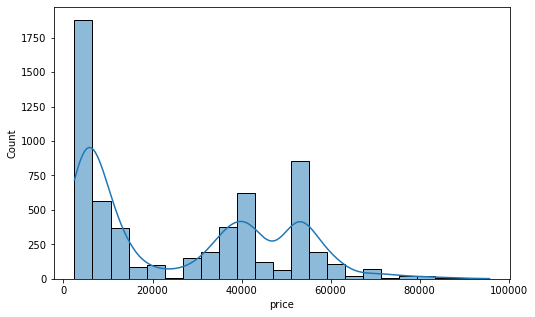

In [119]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df_new23, kde = True)


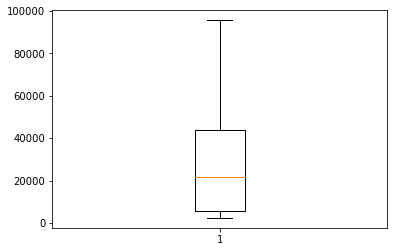

In [120]:

plt.boxplot(df_new22["price"])
plt.show()


In [121]:
df_new22.to_pickle("./df4.pkl")